# Problem 3

In [226]:
import numpy as np
from sklearn import datasets
from collections import Counter
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

dataset = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], 
                                                    dataset['target'], 
                                                    test_size=0.25, 
                                                    random_state=42)

Let's say you need to run linear regression models on a set of experiments. To reduce time and simplify your life, you have decided to write a class that captures the various things you might want to do with a linear model. 

Consider the multivariate linear model $y = X\beta + \epsilon$,  where $y$ is a length $n$ vector, $X$ is an $mxp$ matrix, and $\beta$ is a $p$ length vector. Here, $\beta$ is the vector of coefficients.

We know through matrix calculus that $\hat{\beta} = (X^TX)^{-1}X^Ty$.

Write a class with the following methods:

$fit()$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model.

$predict()$: Predict new values given the fitted model.

$score()$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

1. Based on the Regression parent class, create three subclasses: LinearRegression, RidgeRegression, and LassoRegression.

In [1]:
class Regression(object):
    
    def __init__(self):
        self.params = dict()
    
    def get_params(self):
        return self.params
        
    def fit(self, X, y):
        raise NotImplementedError()
        
    def predict(self, X):
        raise NotImplementedError()
        
    def score(self, X, y):
        raise NotImplementedError()

In [208]:
class LinearRegression(Regression):
    
    def __init__(self):
        #super()
        super(LinearRegression, self).__init__()
        
    def fit(self, X, y):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        beta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        self.params['coef'] = beta[1:]
        self.params['intercept'] = beta[0]
    
    def predict(self, X):
        return np.dot(X, self.params['coef'])+self.params['intercept']

    def score(self, X, y):
        y_hat = self.predict(X)
        y_bar = np.mean(y)
        SST = np.sum((y - y_bar)**2)
        SSRes = np.sum((y_hat - y)**2)
        R2 = 1 - SSRes / SST
        return R2

In [209]:
class RidgeRegression(LinearRegression):
    
    def __init__(self, alpha=0.1):
        #super()
        super(RidgeRegression, self).__init__()
        self.params['alpha'] = alpha

    def fit(self, X, y):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
        C = X.T.dot(X) + self.params['alpha']*np.eye(X.shape[1])
        beta = np.linalg.inv(C).dot(X.T.dot(y))
        self.params['coef'] = beta[1:]
        self.params['intercept'] = beta[0]

In [210]:
class LassoRegression(LinearRegression):
    
    def __init__(self, alpha=0.1):
        #super(self)
        super(LassoRegression, self).__init__()
        self.params['alpha'] = alpha

    def fit(self, X, y):
        clf = linear_model.Lasso(alpha=self.params['alpha'])
        clf.fit(X, y)
        self.params['coef'] = clf.coef_
        self.params['intercept'] = clf.intercept_

In [211]:
model = LinearRegression()
model.fit(X_train, y_train)
model = LassoRegression()
model.fit(X_train, y_train)

### 2. For alpha = 0.1, print out the $R^{2}$ scores.

In [220]:
alpha = 0.1
models = [LinearRegression(),
          RidgeRegression(alpha),
          LassoRegression(alpha)]

for model in models:
    model.fit(X_train, y_train)
    print model.score(X_test, y_test)

0.484908663591
0.491805649761
0.501975882135


### 3. Plot the $R^2$ values across a range of alpha values. What would be your model choice and alpha parameter?

In [222]:
points = np.zeros((50, 3))
for id, alpha in enumerate(np.linspace(0.05, 1, 50)):
    models = [LinearRegression(),
          RidgeRegression(alpha),
          LassoRegression(alpha)]

    for num, model in enumerate(models):
        model.fit(X_train, y_train)
        points[id, num] = model.score(X_test, y_test)

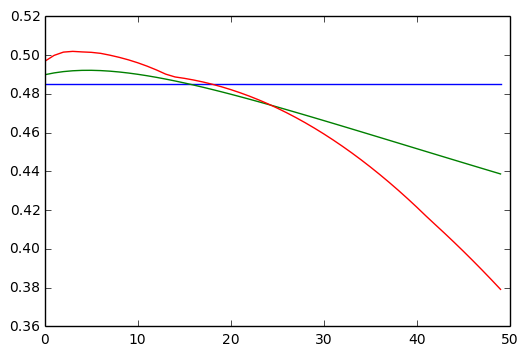

In [224]:
plt.plot(points)